# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | plettenberg bay
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | kunashak
Processing Record 7 of Set 1 | bredy
Processing Record 8 of Set 1 | magistral'nyy
Processing Record 9 of Set 1 | fort bragg
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | mizque
Processing Record 12 of Set 1 | nemuro
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | tianshui
Processing Record 17 of Set 1 | kristinestad
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | jackson
Processing Record 22 of Set 1 | bar
Processing Record 23 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-10.62,94,100,4.16,RU,1697311735
1,ushuaia,-54.8000,-68.3000,7.81,57,0,6.69,AR,1697311723
2,port-aux-francais,-49.3500,70.2167,1.22,67,45,9.00,TF,1697311710
3,plettenberg bay,-34.0527,23.3716,14.59,83,73,5.16,ZA,1697312043
4,ilulissat,69.2167,-51.1000,-1.99,69,100,6.17,GL,1697311722


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-10.62,94,100,4.16,RU,1697311735
1,ushuaia,-54.8000,-68.3000,7.81,57,0,6.69,AR,1697311723
2,port-aux-francais,-49.3500,70.2167,1.22,67,45,9.00,TF,1697311710
3,plettenberg bay,-34.0527,23.3716,14.59,83,73,5.16,ZA,1697312043
4,ilulissat,69.2167,-51.1000,-1.99,69,100,6.17,GL,1697311722


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

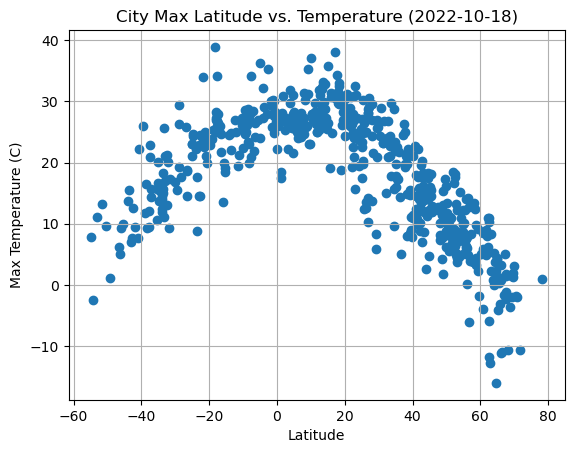

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat,temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

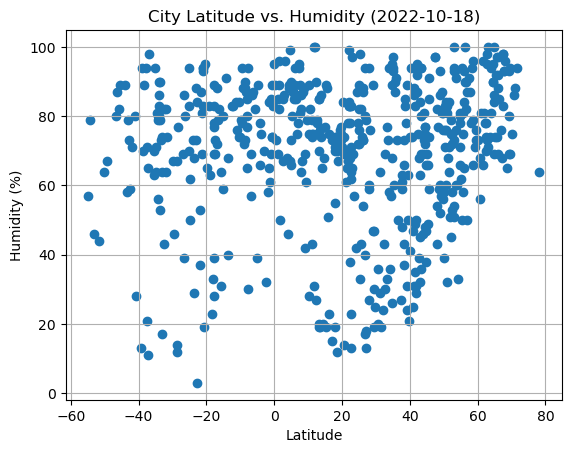

In [10]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humid = city_data_df["Humidity"]
plt.scatter(lat,humid)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

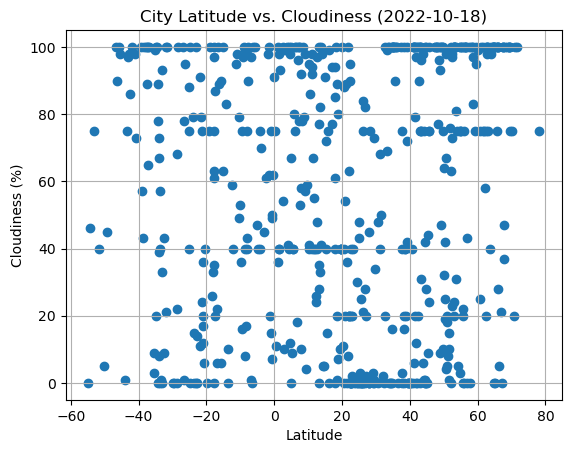

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
lat = city_data_df["Lat"]
cloud = city_data_df["Cloudiness"]
plt.scatter(lat,cloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

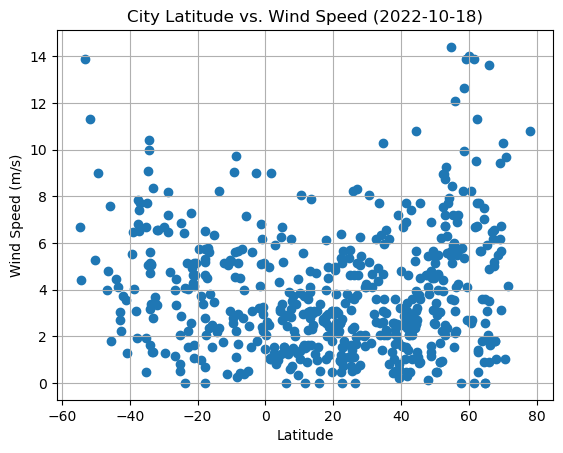

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
lat = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]
plt.scatter(lat,wind)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [86]:
# Define a function to create Linear Regression plots
#x_values = city_data_df["Lat"]
#y_values = city_data_df["Max Temp"]
def lineRegress(x_values, y_values, title, text_coordinates):
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [93]:
#lineRegress(x_values, y_values, "Max Temp", (0,30))


In [88]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-10.62,94,100,4.16,RU,1697311735
4,ilulissat,69.2167,-51.1000,-1.99,69,100,6.17,GL,1697311722
5,kunashak,55.7032,61.5498,6.40,81,22,3.55,RU,1697312043
6,bredy,52.4153,60.3411,6.34,72,23,3.93,RU,1697312043
7,magistral'nyy,56.1725,107.4458,0.21,90,100,2.21,RU,1697311809


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,7.81,57,0,6.69,AR,1697311723
2,port-aux-francais,-49.3500,70.2167,1.22,67,45,9.00,TF,1697311710
3,plettenberg bay,-34.0527,23.3716,14.59,83,73,5.16,ZA,1697312043
10,mizque,-17.9410,-65.3402,28.22,33,33,6.51,BO,1697312044
12,waitangi,-43.9535,-176.5597,13.79,89,1,4.47,NZ,1697311713


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7549710070385478


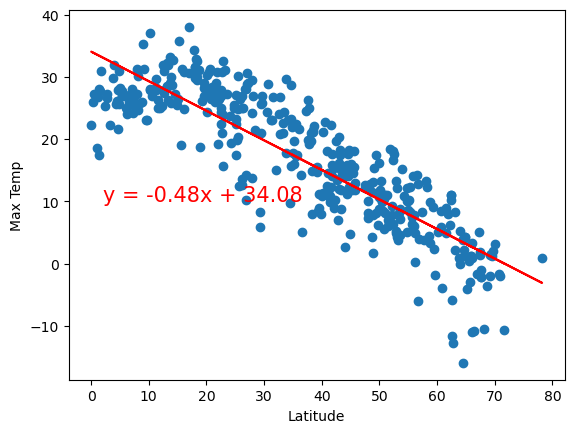

In [98]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
lineRegress(x_values, y_values, "Max Temp", (2,10))

The r-value is: 0.6216987772631873


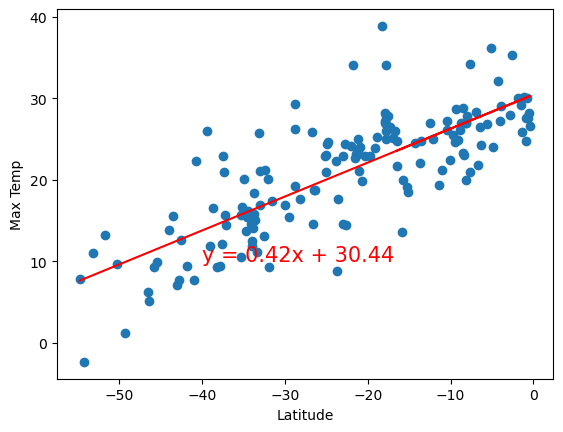

In [99]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
lineRegress(x_values, y_values, "Max Temp", (-40,10))

**Discussion about the linear relationship:** The linear relationship between Temperature and Latitude is both evident and clear. As the latitude goes higher in the northern hemisphere it makes sense for the max temp to be dropping a bit and for the southern hemisphere, as it gets closer to the equator, the max temp will raise to match that tropical temperment.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01586560533933185


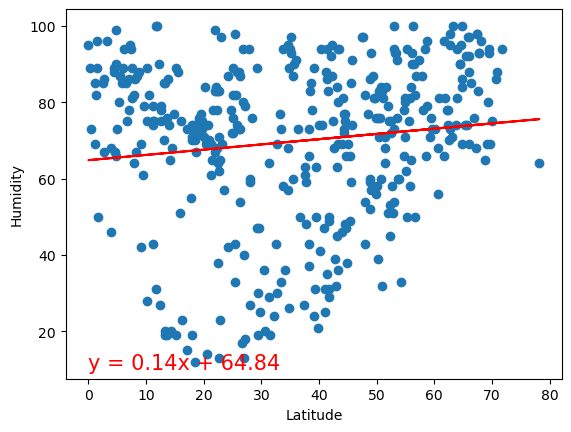

In [101]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
lineRegress(x_values, y_values, "Humidity", (0,10))

The r-value is: 0.012245134200120102


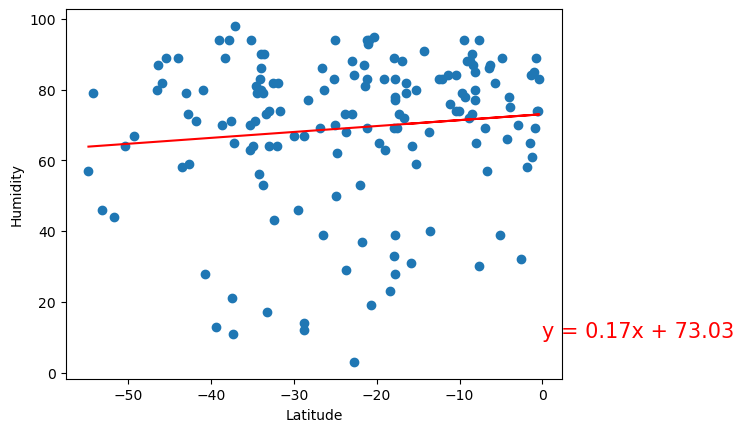

In [102]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
lineRegress(x_values, y_values, "Humidity", (0,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


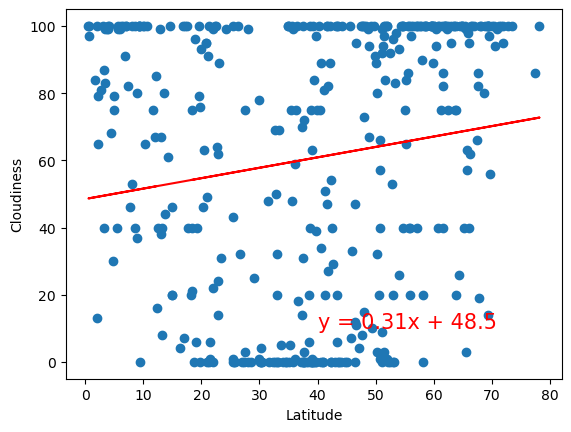

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
lineRegress(x_values, y_values, "Cloudiness", (0,10))

The r-value is: 0.02056735429994368


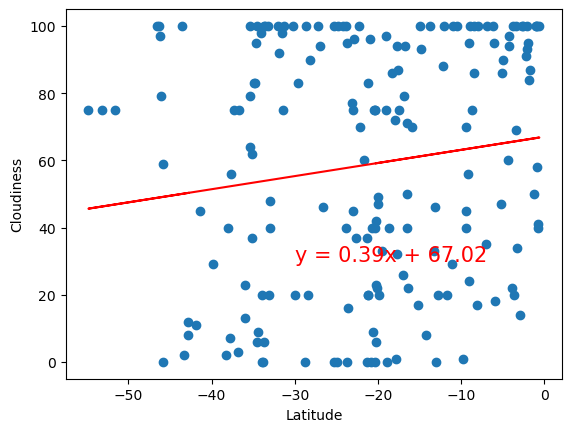

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
lineRegress(x_values, y_values, "Cloudiness", (0,10))

**Discussion about the linear relationship:** There is not a whole lot of relationship between cloudiness and latitude as shown above with the graphs. Most of the data regarding where the clouds appear based on latitude is as floaty as a cloud. I would say this has a poor correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11190497093541836


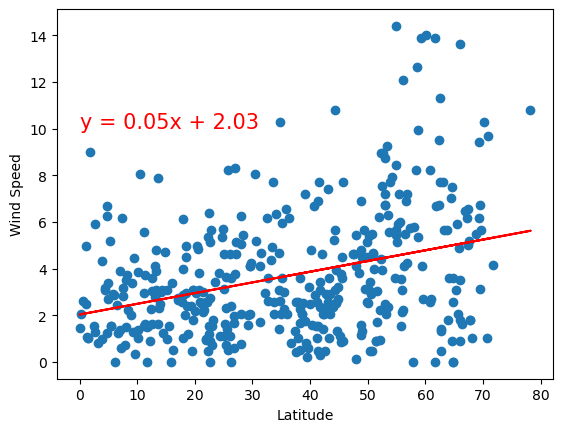

In [103]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
lineRegress(x_values, y_values, "Wind Speed", (0,10))

The r-value is: 0.06167158711487321


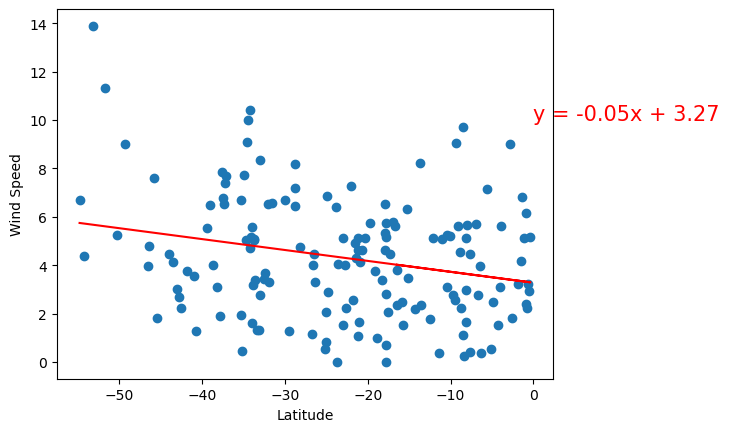

In [104]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
lineRegress(x_values, y_values, "Wind Speed", (0,10))

**Discussion about the linear relationship:** If there is a linear relationship between wind speed and latitude then its a very weak one. Might have some more strength than the correlation between clouds and latitude but as shown above, there data is a little mixed and no clear pattern emerges.